# Diabetes Prediction Model
Using the following algorithms
* Logistics Regression
* Random Forest
* XGBoost

Logistics Regression
* Baseline Model - a simple, interpretable model that gives you a good starting point to compare other models against
* Predic the probability of diabetes (0 or 1) based on a linear relationship between input features and the target.

Random Forest
* Capture complex patterns in the data by building an ensemble of decision trees
* Each tree looks at a random subset of the data and features, and their collective decisions are aggregated (majority vote for classification)

XGBoost
* Build a highly accurate model by learning from the mistakes of previous trees in a boosting framework
* Optimized for speed and performance, especially in structured/tabular data

In [5]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [7]:
import xgboost as xgb

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#to see the visualizations on the jupyter notebook
%matplotlib inline

In [28]:
#load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [11]:
#check the loaded data

In [30]:
#check the data head
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [31]:
# check som info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [32]:
# get some statistical information about the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [51]:
#get the list of columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [54]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<Axes: >

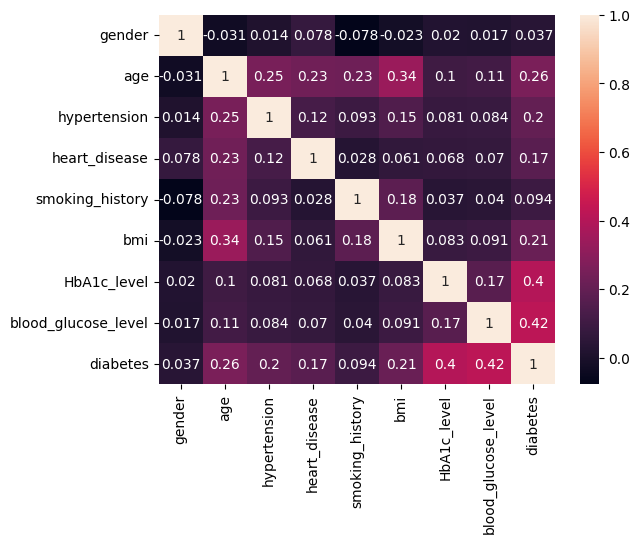

In [56]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [41]:
#check for nulls
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# no nulls were found in our data

In [42]:
#encode categorical variables to convert to numerical values
label_enc = LabelEncoder()

In [43]:
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])

In [47]:
# dependent and independent variables
# put all the columns on the independent variables except for diabetes
X = df.drop('diabetes', axis=1)
# set diabetes column as the dependent variables
y= df['diabetes']

In [50]:
# Splitting data into training and testing sets
# training data 70% and testing data 30%

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Feature Scaling

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training and Predicting

In [61]:
# Logical Regression

In [62]:
log_reg = LogisticRegression()

In [99]:
# Training
log_reg.fit(X_train_scaled,y_train)
# Predicting
y_pred_log = log_reg.predict(X_test_scaled)

In [100]:
print("-----Logical Regression------")
print(classification_report(y_test, y_pred_log))

-----Logical Regression------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.86      0.61      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.91      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



RESULT INTERPRETATION FOR LOGICAL REGRESSION

Precision - Of all patients predicted as diabetic, how many were actually diabetic?
* Class 0 (No diabetes): 97% of predicted non-diabetics were truly non-diabetic
* Class 1 (Diabetes): 86% of predicted diabetics were correct — decent, but room for improvement.

Recall - Of all actual diabetic patients, how many did the model correctly identify?
* Class 0: 99% of actual non-diabetics were correctly identified.
* Class 1: Only 61% of actual diabetics were caught — this is a concern for a medical model, because 39% of diabetics were missed.

F1-Score - Harmonic mean of precision & recall. Good when balance is considered.
* Class 1 F1-score = 0.72 → reflects a trade-off between decent precision but lower recall.

Overall Accuracy: 96%
* The model is very good at identifying non-diabetic patients.
* It struggles to catch all diabetic patients — only 61% recall.
* In healthcare, recall for positive cases (diabetics) is usually more important — its possible to flag a false positive than miss a diabetic case.

In [68]:
# Random Forest

In [73]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [101]:
# Training
rf.fit(X_train, y_train)
# Predicting
y_pred_rf = rf.predict(X_test)

In [91]:
print("-----Random Forest------")
print(classification_report(y_test, y_pred_rf))

-----Random Forest------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.96      0.68      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000



RESULT FOR RANDOM FOREST

Precision (class 1 = diabetes = 0.96)
* Of all the patients the model predicted as diabetic, 96% were actually diabetic.
* That’s really good — fewer false positives.

Recall (class 1 = 0.68)
* Of all the actual diabetics, it correctly identified 68%.
* This is better than Logistic Regression (which was 61% recall), but still means 32% of diabetics were missed

F1-score (class 1 = 0.80)
* Balanced view between precision and recall — shows much better overall in finding diabetic patients than with logistic regression (which had 0.72 F1).

Overall Accuracy: 97%
* Excellent at finding non-diabetics (class 0 recall = 1.00).
* Much better than Logistic Regression at finding diabetics, but still missing about 1 in 3 cases.
* In a medical context, you may want to push that recall even higher to avoid missing diabetics

In [77]:
# XGBoost

In [115]:
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

In [116]:
# Training
xgb_model.fit(X_train, y_train)
# Predicting
y_pred_xgb = xgb_model.predict(X_test)

In [117]:
print("-----XGBoost------")
print(classification_report(y_test, y_pred_rf))

-----XGBoost------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.96      0.68      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000



In [118]:
#ROC -AUC for XGBoost

In [121]:
y_proba = xgb_model.predict_proba(X_test)[:,1]
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba))

XGBoost ROC-AUC Score: 0.977947640848604


The result were quite similar to Random Forest
Since ROC-AUC = 0.978, it means:
* XGBoost model is highly effective at distinguishing between diabetics and non-diabetics.
* There’s a very high chance that a randomly chosen diabetic patient will be ranked higher than a non-diabetic patient.

ROC-AUC Definition
* ROC (Receiver Operating Characteristic) Curve: Plots True Positive Rate (Recall) vs. False Positive Rate.
* AUC (Area Under the Curve): Measures the overall ability of the model to distinguish between diabetic and non-diabetic patients.